In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # nice visualisations
import matplotlib.pyplot as plt # basic visualisation library
import datetime as dt # library to opearate on dates

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.3.4
numpy version: 1.21.2
seaborn version: 0.11.2


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [3]:
customers = pd.read_csv('customers.csv')

In [4]:
articles = pd.read_csv('articles.csv')

In [5]:
submission = pd.read_csv('submission.csv')

In [6]:
transactions = pd.read_csv('transactions_train.csv')

In [42]:
# Merge Transactions and Articles datasets
df = pd.read_csv('transactions_train.csv', chunksize=50000)
articles = pd.read_csv('articles.csv')
users = next(df)
df = users.merge(articles, on='article_id')

In [43]:
df.shape

(50000, 29)

In [44]:
df.head(10000)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
2,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
3,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
4,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-09-21,05ba3d05e426d46ff849d6a93417a057c76cce7f39e138...,537346013,0.042356,1,537346,Ridge,252,Sweater,Garment Upper body,...,Knitwear,A,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,Oversized jumper in a soft knit with a deep V-...
9996,2018-09-20,04d058c96d7465609222c9179e2a52c173d47f946b257c...,650193001,0.050831,2,650193,Hanako WL,94,Sneakers,Shoes,...,Sneakers,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Hi-tops in imitation suede with an imitation l...
9997,2018-09-20,251bb02b0146663b26101f0f22cf9968a3103eaf38432c...,650193001,0.050831,2,650193,Hanako WL,94,Sneakers,Shoes,...,Sneakers,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Hi-tops in imitation suede with an imitation l...
9998,2018-09-20,27c2cecf24fab7138fce4857896f00af2c628dba6b7431...,650193001,0.050831,2,650193,Hanako WL,94,Sneakers,Shoes,...,Sneakers,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,Hi-tops in imitation suede with an imitation l...


In [45]:
#Find number of unique values
df.nunique().sort_values(ascending=True).to_frame().T

,t_dat,sales_channel_id,index_group_name,index_group_no,perceived_colour_value_name,perceived_colour_value_id,index_name,index_code,product_group_name,perceived_colour_master_name,...,product_type_name,product_type_no,department_name,department_no,price,detail_desc,product_code,prod_name,article_id,customer_id
0,2,2,5,5,8,8,10,10,14,18,...,91,92,219,263,1336,6483,6836,7043,11726,14392


In [46]:
#Build feature set
features = ['product_group_name', 'colour_group_name', 'section_name', 'department_name', 'graphical_appearance_name']

df1 = df[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)
dummies_df.head()

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,...,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment,graphical_appearance_name_Unknown
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
#Set minimum number of items bought by a customer
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())

In [48]:
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment,graphical_appearance_name_Unknown
customer_id,,,,,,,,,,,,,,,,,,,,,
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280,0.000000,0.0,0.0,0.000000,0.080000,0.120000,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.160000,0.000000,0.0,0.00,0.0
000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8,0.013333,0.0,0.0,0.000000,0.026667,0.160000,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.026667,0.0,0.0,0.086667,0.000000,0.0,0.00,0.0
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,0.061538,0.0,0.0,0.000000,0.030769,0.092308,0.0,0.00,0.015385,0.000000,...,0.0,0.015385,0.046154,0.0,0.0,0.123077,0.015385,0.0,0.00,0.0
001521e8394eb81ba43ab5b84ae7e756d51ac813be212a96e8779e0e42c029c0,0.000000,0.0,0.0,0.035294,0.035294,0.082353,0.0,0.00,0.000000,0.047059,...,0.0,0.000000,0.000000,0.0,0.0,0.100000,0.017647,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd9c246a42bdf42c6923238d0b5e66ba157ec68c5bcc61d89f24bb466d3cddc,0.000000,0.0,0.0,0.000000,0.000000,0.085714,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.085714,0.000000,0.0,0.00,0.0
ffe6376eb6b854d842e5a7714ea758de127f086a60d67d5cf425ef20361acea1,0.010000,0.0,0.0,0.040000,0.040000,0.090000,0.0,0.01,0.000000,0.000000,...,0.0,0.010000,0.000000,0.0,0.0,0.120000,0.000000,0.0,0.00,0.0
fff04954c6e484a8deb5ec475e581aefd25d5850d1886f6c0198edaa9b67c958,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.0,0.00,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.066667,0.000000,0.0,0.00,0.0


In [49]:
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,...,graphical_appearance_name_Other pattern,graphical_appearance_name_Other structure,graphical_appearance_name_Placement print,graphical_appearance_name_Sequin,graphical_appearance_name_Slub,graphical_appearance_name_Solid,graphical_appearance_name_Stripe,graphical_appearance_name_Transparent,graphical_appearance_name_Treatment,graphical_appearance_name_Unknown
article_id,,,,,,,,,,,,,,,,,,,,,
663713001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
541518023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
505221004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685687003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685687004,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636724007,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
611600003,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
596400002,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
#Score the various articles within the articles dataset. 
scores = normalized_user_feature.dot(item_feature.T)
scores

article_id,663713001,541518023,505221004,685687003,685687004,685687001,505221001,688873012,501323011,598859003,...,668740001,625779004,637348003,656059001,551790005,636724007,611600003,596400002,657614004,606778001
customer_id,,,,,,,,,,,,,,,,,,,,,
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.000000,0.000000,0.640000,0.720000,0.680000,0.680000,0.600000,0.200000,0.000000,0.000000,...,0.000000,0.120000,0.200000,0.200000,0.200000,0.200000,0.240000,0.240000,0.000000,0.000000
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280,0.200000,0.160000,0.120000,0.120000,0.120000,0.120000,0.120000,0.520000,0.560000,0.560000,...,0.160000,0.120000,0.120000,0.320000,0.160000,0.280000,0.280000,0.120000,0.040000,0.000000
000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8,0.160000,0.086667,0.186667,0.253333,0.253333,0.253333,0.200000,0.160000,0.186667,0.126667,...,0.113333,0.066667,0.220000,0.320000,0.160000,0.246667,0.246667,0.160000,0.086667,0.013333
000fb6e772c5d0023892065e659963da90b1866035558ec16fca51b0dcfb7e59,0.184615,0.123077,0.092308,0.169231,0.169231,0.184615,0.092308,0.123077,0.246154,0.184615,...,0.215385,0.076923,0.138462,0.276923,0.107692,0.215385,0.215385,0.107692,0.061538,0.000000
001521e8394eb81ba43ab5b84ae7e756d51ac813be212a96e8779e0e42c029c0,0.105882,0.123529,0.105882,0.105882,0.094118,0.094118,0.129412,0.123529,0.141176,0.135294,...,0.117647,0.076471,0.094118,0.188235,0.082353,0.182353,0.182353,0.100000,0.005882,0.029412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffd9c246a42bdf42c6923238d0b5e66ba157ec68c5bcc61d89f24bb466d3cddc,0.428571,0.342857,0.114286,0.200000,0.228571,0.200000,0.114286,0.085714,0.114286,0.142857,...,0.085714,0.057143,0.142857,0.228571,0.114286,0.171429,0.200000,0.114286,0.114286,0.314286
ffe6376eb6b854d842e5a7714ea758de127f086a60d67d5cf425ef20361acea1,0.280000,0.130000,0.120000,0.240000,0.240000,0.230000,0.110000,0.140000,0.340000,0.210000,...,0.130000,0.150000,0.110000,0.370000,0.110000,0.210000,0.220000,0.100000,0.160000,0.010000
fff04954c6e484a8deb5ec475e581aefd25d5850d1886f6c0198edaa9b67c958,0.200000,0.100000,0.200000,0.233333,0.233333,0.233333,0.200000,0.266667,0.200000,0.066667,...,0.066667,0.133333,0.200000,0.400000,0.200000,0.266667,0.266667,0.200000,0.166667,0.000000


In [51]:
def get_rcmnd(customer_id):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)   
    return ordered, customer_prev_items

In [62]:
#Recommendations for a specific customer
k = 6
customer_id = scores.index[1]
rcmnds, prev_items = get_rcmnd(customer_id)
rcmnds = rcmnds.index.values[:k]
path = "images"

In [63]:
def plot_prev():
    fig = plt.figure(figsize=(25, 15))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

In [64]:
def plot_rcmnd():
    fig = plt.figure(figsize=(25, 15))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1, 6, i)
        plt.imshow(image)

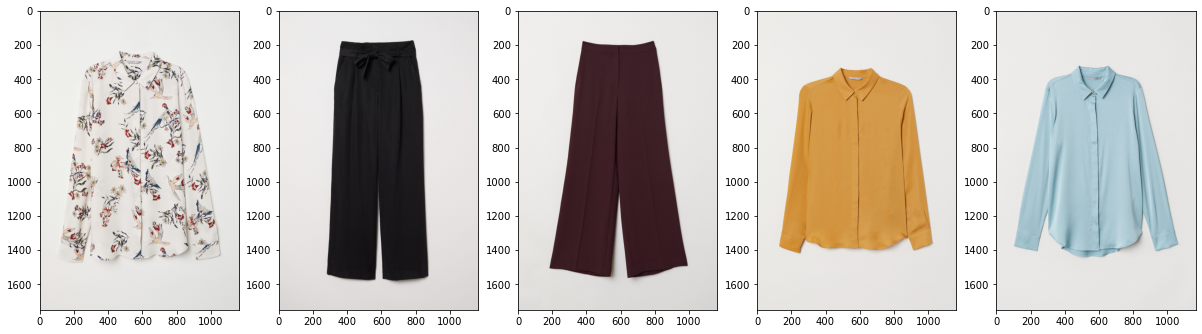

In [65]:
#Previosuly bought articles
plot_prev()

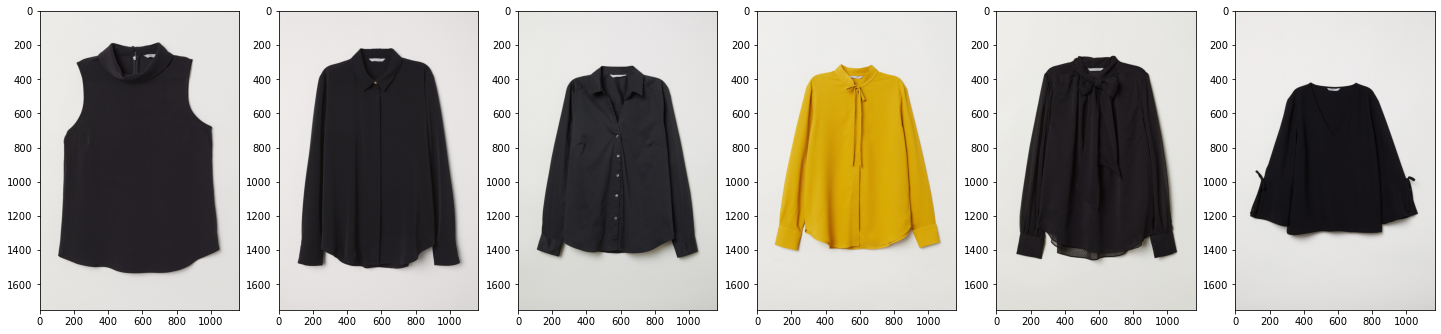

In [66]:
#Recommended articles
plot_rcmnd()